In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import time
from scipy import sparse
import numpy.linalg as lin
from scipy.stats import norm

## Drilling and Real Options

In [2]:
D = 3000000
X = 100000
P = 50 # given
ρ = 0.05
δ = 1/(1+ρ)
P1 = P + np.random.normal(0, 4)

In [3]:
# Solve for the optimal Trigger price

# a) set up the state space as a vector of possible oil prices
P_grid = np.linspace(0,80,81)

Profits = P_grid*X - D

In [4]:
# b) Define the state transition matrix T that gives, for each row i, the proba the next period's price will 
# be "in" the col state j

T_price = np.zeros((81, 81))

# Cutoff grid = middle of price grid
P_grid_inter = np.zeros(81)
for j in range(81-1):
    P_grid_inter[j] = (P_grid[j] + P_grid[j+1])/2
P_grid_inter[80] = np.inf

# Compute price transition matrix
for i in range(81):
    Pcdf = norm.cdf(P_grid_inter, P_grid[i], 4)
    Ppdf = np.zeros(81)
    for k in range(1,81):
        Ppdf[k] = Pcdf[k] - Pcdf[k-1]
    Ppdf[0] = Pcdf[0]
    T_price[i,:] = Ppdf

np.round(np.sum(T_price, axis=1), 5) == 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# c) Use VFI to compute the value function and the control function
# report the "trigger price" at which drilling is optimal


### Initiate vectors & numbers
iter = 0
epsi = 1
tol = 1e-8
maxiter = 1000
N = len(P_grid)
Vp_new = np.zeros(N)
Vp = np.ones(N)
now = np.zeros(N)

### We already have the utility (profit) matrix from before
# Profit 

### VFI
iter = 0
while (epsi > tol) & (iter < maxiter):
    # For each starting price
    Vold = np.copy(Vp)
    nowold = np.copy(now)
    for ik in range(N):
        #isgreater0 = 1*(Profits[ik] > 0)
        EVnext = np.dot(Vp, T_price[ik,:])
        #print(Vnext)
        drilltoday = Profits[ik] + 0
        drilltomorrow = δ * EVnext
        Vp[ik] = max(drilltoday, drilltomorrow)
        now[ik] = (drilltoday >= drilltomorrow)
        #print(Vnext)
    
    epsi = lin.norm(Vp - Vold)
    
    if epsi < tol:
        break
        
    iter=iter+1
    print("iter is ", iter, "and norm is ", epsi)        
    
triggerprice = np.min(np.where(now==1)[0])

iter is  1 and norm is  20718343.201135807
iter is  2 and norm is  324449.14590140415
iter is  3 and norm is  212902.59418132566
iter is  4 and norm is  160704.1519463266
iter is  5 and norm is  127941.58381819326
iter is  6 and norm is  104912.50216275868
iter is  7 and norm is  87677.44608631416
iter is  8 and norm is  74210.19012209596
iter is  9 and norm is  63435.880899050564
iter is  10 and norm is  54684.11687461095
iter is  11 and norm is  47515.45515555741
iter is  12 and norm is  41616.07051441495
iter is  13 and norm is  36680.072939797894
iter is  14 and norm is  32504.20361376454
iter is  15 and norm is  28935.436267139743
iter is  16 and norm is  25856.30800791992
iter is  17 and norm is  23176.28043707488
iter is  18 and norm is  20825.39417044625
iter is  19 and norm is  18749.3555251835
iter is  20 and norm is  16905.71464841143
iter is  21 and norm is  15260.931742649898
iter is  22 and norm is  13788.161193765172
iter is  23 and norm is  12465.600101125046
iter is  2

<function matplotlib.pyplot.show(*args, **kw)>

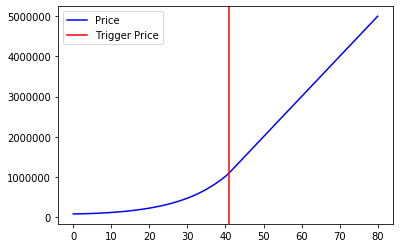

In [6]:
plt.plot(P_grid, Vp, color="blue", label="Price")
plt.axvline(x=triggerprice, color="red", label="Trigger Price")
plt.legend()
plt.show

The price curve is a straight line after the trigger price because from that price onwards, the drilling option is not valuable anymore as the drilling will happen for these prices, so future prices are not relevant anymore. The uncertainty about future prices is what gives value to the drilling option.